# Исследование интернет-магазина игр

**Описание проекта**

Имеется интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следующий год.

**Имеющиеся данные:**
- Данные об имеющихся играх (таблица games):
    - Name - наименование игры
    - Platform - платформа
    - Year_of_Release - год выпуска
    - Genre - жанр
    - NA_sales - продажи в Северной Америке
    - EU_sales - продажи в Европе
    - JP_sales - продажи в Японии
    - Other_sales - продажи в других регионах
    - Critic_Score - оценка критиков (максимум 100)
    - User_Score - оценка пользователей (максимум 10)
    - Rating - рейтинг

**Содержание проекта:**
<br>[1. Загрузка данных](#ref1)

<br>[2. Предобработка данных](#ref2)
<br>[2.1  Переименуем столбцы в корректный формат.](#ref2.1)
<br>[2.2  Преобразуем типы полей.](#ref2.2)
<br>[2.3  Обработаем пропуски.](#ref2.3)
<br>[2.4  Посчитаем суммарные продажи по каждому региону.](#ref2.4)

<br>[3. Исследовательский анализ данных](#ref3)
<br>[3.1  Оценим количество выпускаемых игр в разные года.](#ref3.1)
<br>[3.2  Оценим продажи по платформам.](#ref3.2)
<br>[3.3  Изучим суммарные продажи по играм.](#ref3.3)
<br>[3.4  Изучим влияние отзывов на продажи.](#ref3.4)
<br>[3.5  Изучим распределение игр по жанрам.](#ref3.5)

<br>[4. Портрет пользователя каждого региона](#ref4)
<br>[4.1  Самые популярные платформы.](#ref4.1)
<br>[4.2  Самые популярные жанры.](#ref4.2)
<br>[4.3  Влияние рейтинга ESRB на продажи.](#ref4.3)

<br>[5. Проверим гипотезы](#ref5)
<br>[5.1  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.](#ref5.1)
<br>[5.5  Средние пользовательские рейтинги жанров Action и Sports разные.](#ref5.2)

<br>[6. Общие выводы](#ref6)

## Загрузка данных
<a id='ref1'></a>

Посмотрим на имеющиеся данные.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings


In [2]:
try:
    games = pd.read_csv('...')
except:
    games = pd.read_csv('...')
games.info() #выведем общую информацию о датафрейме
games.head() #выведем первые несколько строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


По итогу знакомства с данными, видим, что у нас есть информация:
- об игре (название, год выпуска, платформа, возрастной ценз)
- о количествах продаж в каждом регионе (Северная Америка, Япония, Европа и остальные регионы)
- о пользовательских и экспертных рейтингах игры

<br> Видим, что наименования колонок необходимо привести к нижнему регистру.
<br> Видим пропуски в следубщих полях: Name, Genre, Year_of_Release, Critic_Score, User_Score, Rating.
<br> Также видим, что типы данных некоторых полей необходимо заменить:
- Year_of_Release предствлен во float, хотя год не может быть дробным числом
- User_Score представлен в object, хотя содержит дробное число

## Предобработка данных
<a id='ref2'></a>

**2.1 Переименуем столбцы в корректный формат.** <a id='ref2.1'></a>

In [3]:
games.columns = games.columns.str.lower()
games.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


**2.2 Преобразуем типы полей.** <a id='ref2.2'></a>

Преобразуем типы следующих полей:
- year_of_release: сейчас float, сделаем int, тк. год выпуска не может быть дробным числом. В качестве замены поставим год 1970, т.к. в этом году видеоигр еще не было (и мы будем понимать, что это значение для игр, у которых год не задан). 
- user_score: преобразуем в значение float, аналогично critic_score
<br>Так как при преобразовании типов мешают значения NaN и tbd, заменим их на -1 и будем знать, что для этих значений год\оценка не указаны.

In [4]:
games.loc[games['year_of_release'].isna(),'year_of_release'] = 1970 #т.к. Nan не преобразуется, заменим его на 0
games['year_of_release'] = games['year_of_release'].astype(int) #преобразуем тип
games['year_of_release'].unique() #проверим все уникальные значения

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1970, 1995,
       1991, 1981, 1987, 1980, 1983])

Пропуски по year заполнились.
<br>Посмотрим на уникальные значения поля user_score

In [5]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим, что есть значения "tbd" (to be difined), значит, оценка еще будет проставлена, а пока что ее нет. 
Для целей преобразования заменим значения Nan и tbd на -1 и преобразуем тип данных.

In [6]:
games.loc[(games['user_score'] =='tbd')|(games['user_score'].isna()),'user_score'] = '-1' #заменим на -1
games['user_score'].unique() #проверим замену

array(['8', '-1', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [7]:
games['user_score'] = games['user_score'].astype(float)
games['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

Проверим финально типы данных в таблице

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


Все корректно, можно переходить к заполнению пропусков.

**2.3 Обработаем пропуски.** <a id='ref2.3'></a>

Посчитаем количество пропусков:

In [9]:
games.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score            0
rating             6766
dtype: int64

Обработаем пропуски для следующих полей:
- name, genre - судя по тому что в полях по 2 пропуска, есть вероятность, что в одних и тех же строках
- critic_score, user_score, rating - проверим, можно ли заполнить пропуски медианой/модой по каждой игре (если в таблице каждая игра встречается не единожды)

In [10]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,-1.0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,-1.0,NaN


Действительно, у данных двух строк не указано ни название игры, ни жанр. Однако, есть данные по продажам, поэтому заменим пустые значения на "Не указано", чтобы в дальнейшем иметь возможность работать с этими данными.

In [11]:
games.loc[games['name'].isna(),'name']='Не указано'
games.loc[games['genre'].isna(),'genre']='Не указано'
games[games['name']=='Не указано']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Не указано,GEN,1993,Не указано,1.78,0.53,0.00,0.08,NaN,-1.0,NaN
14244,Не указано,GEN,1993,Не указано,0.00,0.00,0.03,0.00,NaN,-1.0,NaN


Пропуски по name, genre заполнились. 
<br>Посмотрим на уникальные значения полей critic_score, rating. Значенеия user_score мы видели выше, когда заполняли пропуски.

In [12]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [13]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Так как оценки достаточно субъективны по каждой игре, оставим это поле как есть. Тем более, что даже если заполнять проуски по critic_score медианой по каждой выбранной игре, количество заполненных пропусков будет очень небольшим.

Поле 'rating' категориальное, поэтому для него будем использовать моду.
Заполним поле модой по названию игры.

In [14]:
#определим функцию, вычисляющую моду
warnings.filterwarnings("ignore")
def calc_game_rating_mode(row):
    if (pd.isna(row['rating']) & (games.loc[(games['name']==row['name']),['rating']].count()[0]>0)):
        return games.loc[(games['name']==row['name']),['rating']]['rating'].mode(dropna=True)[0]
    else:
        return row['rating']
#заполним значения
games.loc[(pd.isna(games['rating'])),'rating'] = games.loc[(pd.isna(games['rating']))].apply(calc_game_rating_mode, axis=1)


Посмотрим, сколько пропусков заполнилось.

In [15]:
games['rating'].count()

10386

Было 9949 заполненных значений, стало 10386. Итого заполнилось 437 строки.

Вывод по заоплнению пропусков:
- пропуски по полям **name,genre** объяснить скорее всего можно только техническими причинами. Вероятно, возникли ошибки при выгрузке данных, так как если есть продажи по какой-либо игре, то игра должна иметь название (и скорее всего жанр). Также видим, что оба поля не заполнены по двум одни и тем же строкам, соответственно, можно сделать вывод, что данные поля загружались из одного источника, либо были как-то взаимосвязаны.
<br> Эти пропуски были заполнены значением "Не указано", т.к. не хотелось бы потерять информацию о продажах в общем отчете.
- пропуски в поле **critic_score** были оставлены "как есть", так как экспертная оценка субъективна и может отличаться даже в рамках одной игры на разных платформах.
- пропуски по полю **rating** были заполнены модой, так как поле категориальное. Также как и в случае с critic_score заполнение производилось по каждой игре в отдельности. Причиной возникновения пропусков можно назвать организационный фактор: по определенным играм рейтинг игры мог не формироваться из-за недостаточности оценок например, либо игра очень старая, либо потому что игра только вышла и еще не успела получить оценку (в таком случае может быть значение tbd).

**2.4 Посчитаем суммарные продажи по каждому региону.** <a id='ref2.4'></a>

In [16]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales','other_sales']].sum(axis=1)
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN,31.38


In [17]:
games['total_sales'].isna().sum()

0

In [18]:
games['total_sales'].describe()

count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

Поле с суммарными продажами добавлено. По описательной статистике поля видим, что среднее составляет примерно полмиллина проданных копий. Максимум - 82,5 миллиона. Минимум - без продаж.
<br>Также интересно, что вычисленное среднее превышает даже 75% квартиль! (0.53>0.47). То есть, выбросы в сторону максимума настолько сильно повлияли, что среднее не только превышает медиану, но даже и 75% всех имеющихся строк. Получается, что данные очень неравномерно распределены: 75% строк скучковано внутри значений 0-0.47, но при этом остальные 25% растянуты аж до значения 82,5.

## Исследовательский анализ данных
<a id='ref3'></a>

**3.1 Оценим количество выпускаемых игр в разные года.** <a id='ref3.1'></a>

In [19]:
years_releases = games.groupby('year_of_release')['name'].count()
years_releases.head(5)

year_of_release
1970    269
1980      9
1981     46
1982     36
1983     17
Name: name, dtype: int64

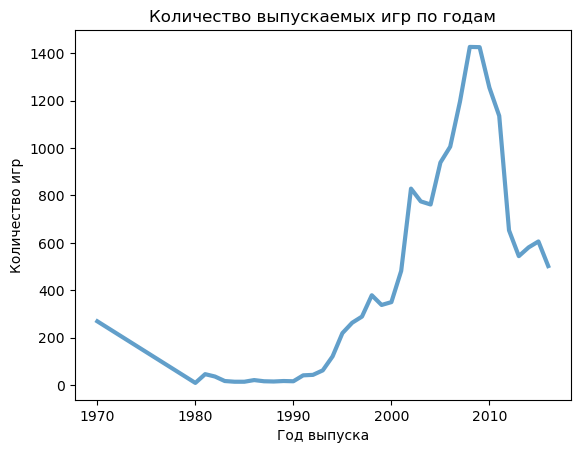

In [20]:
years_releases.plot(
    kind='line',
    y='year_of_release',
    #histtype='step',
    #range=(0, 30),
    #bins=15,
    linewidth=3,
    alpha=0.7,
)
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Количество выпускаемых игр по годам')
plt.show()

Айсберг. Айсберг в океане).
<br> По диаграмме видно, что количество выпускаемых игр стремительно росло примерно до 2008-2010 года, а затем снизилось примерно до уровня 2000-го года. Возможно, объясняется это тем, что мобильные телефоны достигли достаточного уровня развития и пользователи переключились на мобильные игры (соответственно, игр на платформах в связи с уменьшившимся спросом тоже стало выпускаться меньше).
Также помним, что левый хвост графика - это значения, где год выпуска был не указан и мы заполнили его значением 1970. Так мы можем на одном графике соотнести выпуск игр по годам и количество игр, по которым год не указан.
Для нашей задачи нет смысла анализировать всю историю, можно смотреть данные с начала 2000г, например.

**3.2 Оценим продажи по платформам.** <a id='ref3.2'></a>

Посмотрим, как менялись суммарные продажи по платформам с течением лет.

In [21]:
platform_sales_total = games.groupby(by=['platform'],as_index=False)['total_sales'].sum()
platform_sales_total = platform_sales_total.sort_values(by='total_sales',ascending=False)
display(platform_sales_total.style.background_gradient(cmap='Blues', axis=0))

,platform,total_sales
16,PS2,1255.770000
28,X360,971.420000
17,PS3,939.650000
26,Wii,907.510000
4,DS,806.120000
15,PS,730.860000
6,GBA,317.850000
18,PS4,314.140000
19,PSP,294.050000
13,PC,259.520000


Видим, что наиболее полпулярные платформы: PS2,X360, PS3,Wii,DS, PS. 
<br>Наименее популярная платформа - PCFX.
<br>Рассмотрим продажи по самым популярным платформам с течением лет.
<br>Отбросим год 1970, т.к. это заглушка для тех строк, где год не указан.

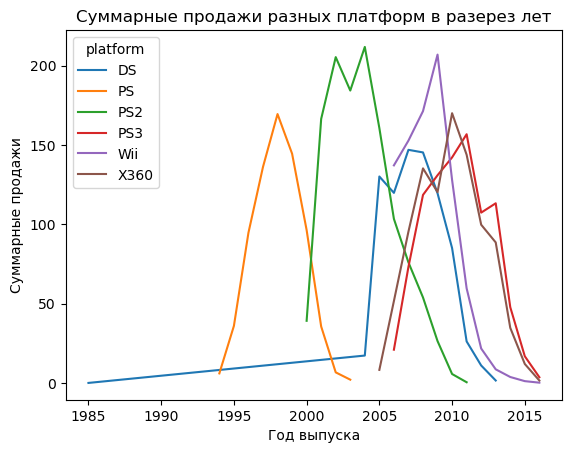

In [22]:
platform_list = ['PS2','X360','PS3','Wii','DS','PS']
platform_sales_by_year = games.query('platform in @platform_list and year_of_release!=1970 and total_sales!=0').groupby(by=['platform','year_of_release'],as_index=False)['total_sales'].sum()
platform_sales_by_year
sns.lineplot(data=platform_sales_by_year,x='year_of_release', y='total_sales',hue='platform')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.title('Суммарные продажи разных платформ в разерез лет')
plt.show()

Видим, что:
- некоторые платформы постепенно заменяли друг друга (например, PS->PS2->PS3: оранжевый, зеленый и красный графики). 
- платформа, выпустившая игру первой (если не брать в расчет игры без года выпуска) - DS, впервые выпустившая игру в 1985году (но, похоже, продаж от нее так и не получившая), однако затем она не выпускала игр вплоть до 2004года. Так что первым сильным лидером можно назвать платформу PS, которая имела хорошие продажи примерно c 1994 до 2004года, а затем была заменена более современной версией PS2
- платформы, получавшие максимальные годовые продажи - PS2(2000-2005годы) и Wii(2009год).
- за последние 5 лет (2010-2015годы) выделяются два лидера - X360 и PS3, продажи которых находились примерно на одном уровне.
- по всем платформам в последние годы в основном наблюдается спад продаж
<br>Рассмотрим продажи последних лет более подробно. В качестве актуального периода возьмем последние 3 года.

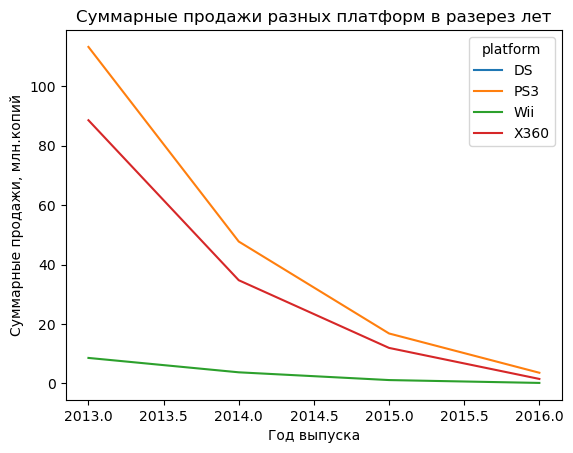

year_of_release,2013,2014,2015,2016
platform,,,,
DS,1.540000,nan,nan,nan
PS3,113.250000,47.760000,16.820000,3.600000
Wii,8.590000,3.750000,1.140000,0.180000
X360,88.580000,34.740000,11.960000,1.520000


In [23]:
platform_sales_by_year_last3 = platform_sales_by_year.query('year_of_release >=2013')
sns.lineplot(data=platform_sales_by_year_last3,x='year_of_release', y='total_sales',hue='platform')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи, млн.копий')
plt.title('Суммарные продажи разных платформ в разерез лет')
plt.show()
platform_sales_by_year_last3 = platform_sales_by_year_last3.pivot(index='platform',columns='year_of_release', values='total_sales')
display(platform_sales_by_year_last3.style.background_gradient(cmap='Blues', axis=0))

В последние 3 года игры выпускают только 3 платформы: PS3, X360 и Wii  и на текущий момент их продажи находятся практически на одном уровне. Однако PS3, X360 в последние 3 года имели продажи гораздо выше (до 80-110 млн. копий игр) и затем постепенно снизили продажи практически до 1,5-3,5млн.копий, в то время как Wii постепенно сдала позиции уже в 2013 году и к 2016году продает не более 200тыс.копий игр.
<br>Таким образом, последние три года потенциально прибыльными платформами игр явяются PS3 и X360, причем, несмотря на то, что падение продаж PS3 происходит быстрее, на конец 2016года PS3 продает почти вдвое больше игр, чем X360 - 3,6млн.копий против 1,5млн копий у X360. 

**3.3 Изучим суммарные продажи по играм.** <a id='ref3.3'></a> 

In [24]:
games['total_sales'].describe()

count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

По описательной статистике видим, что суммарные продажи составляют в основном от 60тыс до 470тыс. копий.
<br>При этом есть выбросы и одна из игр была продана более чем 82,5млн раз!
Посмотрим, что это за игра, а также посмотрим топ-10 игр, имеющих наибольшие продажи.

In [25]:
games.sort_values(by='total_sales',ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,-1.0,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,-1.0,NaN,28.31


Посмотрим продажи игр в разбивке по платфомам. Ограничим на графике значение total_sales до 2 (млн.проданных копий).

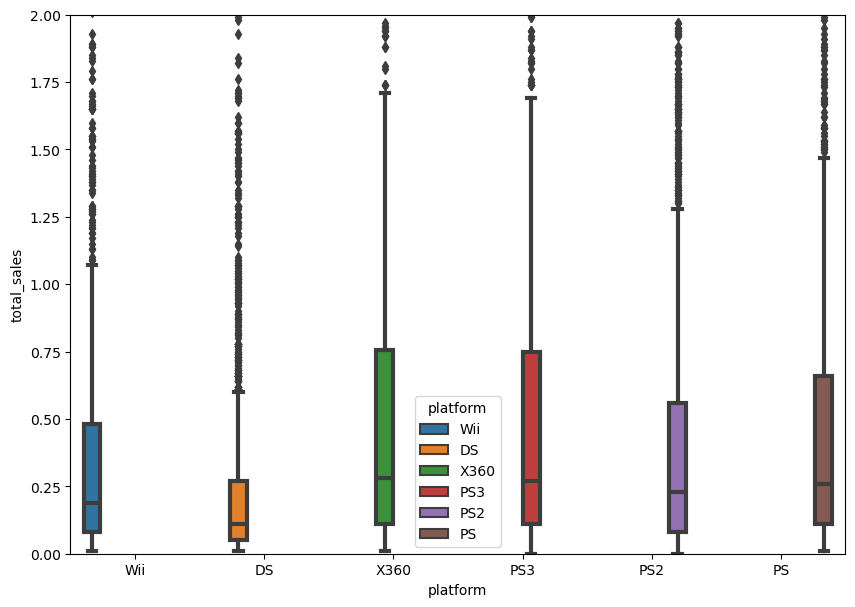

In [26]:
platform_box_data = games.query('platform in @platform_list')
plt.figure(figsize=(10,7))
params = dict(data=platform_box_data ,x = platform_box_data['platform'] ,y = platform_box_data['total_sales'] ,hue=platform_box_data['platform'],dodge=True)
sns.boxplot(**params ,linewidth=3)
plt.ylim(0, 2)
plt.show()

По диаграмме размаха видим, что больше всего выделяются ящики компаний PS3 и X360 и они примерно одинаковы: у них на одном уровне медиана, 25% и 75%квартиль и одинаковый межквартальный размах. Получается, если не смотреть на количество выбросов, то по основной массе игр компании получают примерно одинаковый доход.
На втором месте платформы PS и PS2, далее - Wii и DS.
Отдельно посмотрим на выбросы по каждой популярной платформе (игры с продажами более 2млн.)

In [27]:
print("Всего игр с количеством установок более 2млн.:",games[games['total_sales']>2]['name'].count())
platform_sales_more2 = games[games['total_sales']>2].groupby(by=['platform'],as_index=False).agg({'total_sales':['sum','count']})
platform_sales_more2.columns = ['platform','sum_sales_more2','count_sales_more2']
platform_sales_more2 = platform_sales_more2.sort_values(by='sum_sales_more2',ascending=False).head(6)
display(platform_sales_more2.style.background_gradient(cmap='Blues', axis=0))

Всего игр с количеством установок более 2млн.: 852


,platform,sum_sales_more2,count_sales_more2
12,PS2,514.380000,133
19,X360,514.370000,116
17,Wii,502.390000,67
13,PS3,428.670000,98
3,DS,359.130000,60
11,PS,272.600000,66


В целом за всю историю, только 852 игры из всего списка в 16тыс. имеют более 2млн.установок.
<br>При этом по таблице выбросов видим, что компании PS2 и X360 опять похожи даже по выбросам: практически одинаковые суммарные продажи по выбросам и примерно схожее количество игр.

Посмотрим продажи игр в разбивке по трем платфомам только за последние три года (year_of_release >=2014), так как на других плафтормах игры уже не выпускаются.

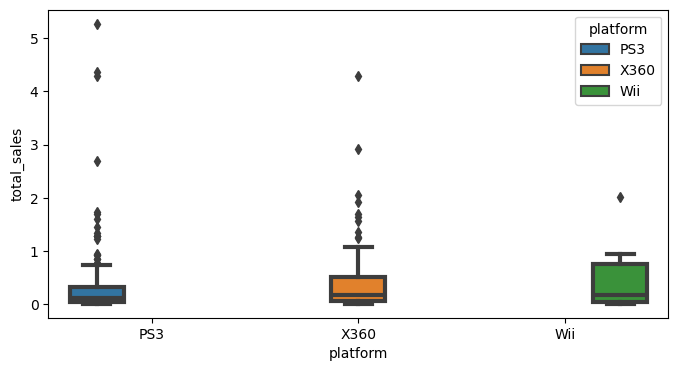

In [28]:
platform_box_data = games.query('platform in @platform_list and year_of_release >=2014')
plt.figure(figsize=(8,4))
params = dict(data=platform_box_data ,x = platform_box_data['platform'] ,y = platform_box_data['total_sales'] ,hue=platform_box_data['platform'],dodge=True)
sns.boxplot(**params ,linewidth=3)
plt.show()

По данному графику видим стратегию каждой из компаний за последние 3 года:
- у платформы PS3 больше всего игр-самородков, приносящих свервысокие продажи (максимально высокие выбросы), однако при этом и самый низкий 75% квартиль, что означает, что компания также выпускает много непопулярных игр. То есть, компания работает на количество: чем больше количество разнообразных игр, тем более вероятно, что какие-то из них станут мегапопулярными. При этом неудачные релизы снижают общую статистику по продажам.
- у компании Wii противоположный подход: меньше всего выбросов, но самый высокий 75% квартиль, что говорит о том, что каждая выпущенная игра стабильно хорошо продается, но при этом мегапопулярной скорее всего не станет (мы видим только 1 выброс и он втрое ниже, чем максимальный выброс по PS3).
- у компании X360 средний подход: есть и стабильно продаваемые игры, и при этом достаточное количество высоких выбросов.

**3.4 Изучим влияние отзывов на продажи.** <a id='ref3.4'></a> 

Рассмотрим влияние отзывов на продажи на примере платформы PS3, так как судя по сделанным вше выводам, у данной платформы есть как очень успешные игры, так и наоборот неуспешные.

Построим диаграмму рассеяния по отзывам критиков и по отзывам пользователей.

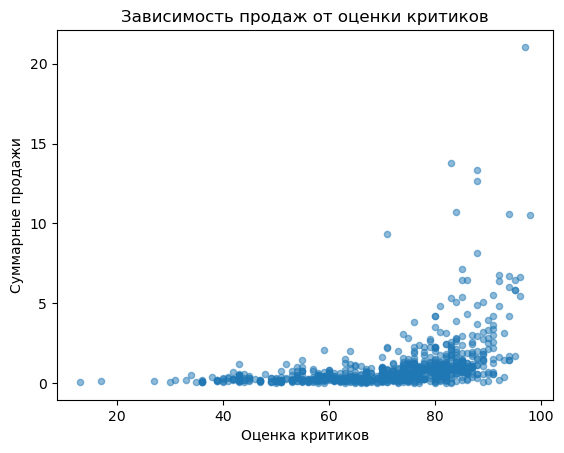

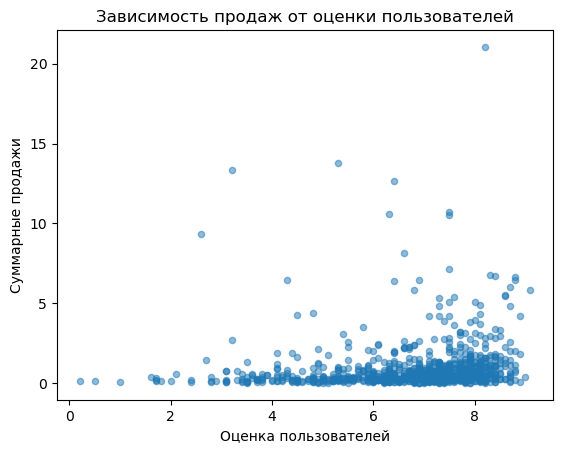

In [29]:
ps3_scores = games.query('platform=="PS3" and user_score!=-1')[['critic_score','user_score','total_sales']]
#fig, axes = plt.subplots(1,2)
ps3_scores.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, xlabel='Оценка критиков',
 ylabel='Суммарные продажи',  title='Зависимость продаж от оценки критиков')
plt.show()
ps3_scores.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, xlabel='Оценка пользователей',
 ylabel='Суммарные продажи',  title='Зависимость продаж от оценки пользователей')
plt.show()

Что можно заметить по графикам:
- игры с высокой оценкой критиков могут как быть очень популярными, так и непопулярными. Однако, игры с низкой оценкой критиков не бывают сверхпопулярными - до оценки 70 нет даже единичных выбросов. Верхняя граница области разброса довольно четкая. 
- по оценкам пользователей зависмость менее однозначная: есть непопулярные игры с высокой оценкой и сверхпопулярные игры  со средней или даже низкой оценкой. Это логично, у разных пользователей разные вкусы и предпочтения и разное субъективное восприятие игр, поэтому оценки могут отличаться от оценок экспертов, которые могут оценивать только объективно по заданным критериям. Но так как продажи формируются именно пользователями (а не критиками), то и даже при высокой оценке критиков игра может стать как популярнй, так и наоборот.
<br>Почему есть случаи низкой оценки пользователей и высокого уровны продаж? Тут скорее всего играют роль несколько факторов: 
- мы не знаем в какое время проставлялись оценки. Возможно, игра вышла например в начале 2000х годов, получила высокие оценки критиков и изначально хорошо продавалась, но со временем игра устаревала, а пользователи продолжали ее устанавливать и проставлять оценки, но из-за того, что игра уже не соответствует времени, итоговая оценка снижалась. 
- либо игра могла быть очень популярна в одном регионе и там формировать основной доход, но при этом вызвала негативные отклики в другом регионе, что вызвало ухудшение общей оценки. Такои случаи можно отдельно проанализировать.
- также фактор, который может повлиять: не все пользователи, которые покупают ту или иную игру, могут проставлять оценки по ней. Скорее всего, есть большое количество людей, которые просто играют (и формируют продажи), но не оставляют ни оценок, ни отзывов.
<br> Проверим, что покажут оценки корреляции.

In [30]:
ps3_scores.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.629005,0.427875
user_score,0.629005,1.000000,0.126691
total_sales,0.427875,0.126691,1.000000


Матрица корреляции подветрждает выводы по графикам: коэффицицент корреляции продаж от оценки критиков равен 0,4 (средняя корреляция), в то время как корреляция от оценки пользователей равна 0,27 (слабая).
Также прослеживается средняя корреляция оценки пользователей от оценки критиков на уровне 0,4, но это скорее говорит о частых случаях, когда мнения критиков и пользователей об игре совпадают, нежели о реальной зависимости оценки пользователей от критиков или наоборот.

Соотнесем с выводами о продажах на других платформах. Для этого рассмотрим аналогичные графики суммарно по 6 выбранным платформам.

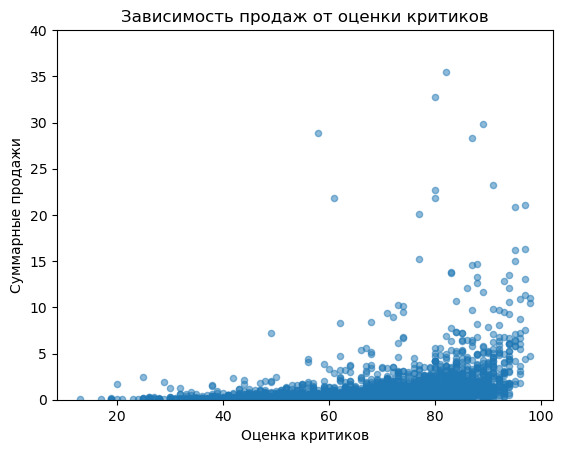

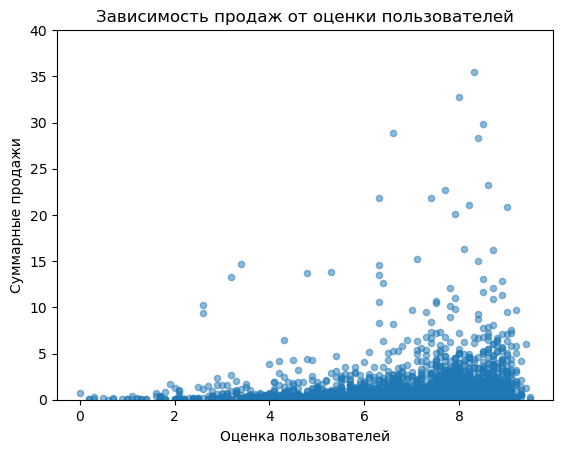

,critic_score,user_score,total_sales
critic_score,1.000000,0.602382,0.272010
user_score,0.602382,1.000000,0.111782
total_sales,0.272010,0.111782,1.000000


In [31]:
all_scores = games.query('platform in @platform_list and user_score!=-1')[['platform','critic_score','user_score','total_sales']]
#fig, axes = plt.subplots(1,2)
all_scores.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, xlabel='Оценка критиков',
 ylabel='Суммарные продажи',  title='Зависимость продаж от оценки критиков')
plt.ylim(0,40)
plt.show()
all_scores.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, xlabel='Оценка пользователей',
 ylabel='Суммарные продажи',  title='Зависимость продаж от оценки пользователей')
plt.ylim(0,40)
plt.show()
all_scores.corr(numeric_only=True)

Если смотреть в целом по всем платформам, то коэффициенты корреляции становятся еще меньше: 0,23 для оценки экспертов и 0,2 для оценки пользователей. Хаоса в данных стало больше. Возможно тут влияет тот факт, что среди наших платформ есть старые и новые поколения одной и той же платформы (PS, PS2, PS3). Также возможно, играет роль, что система оценок могла меняться со временем (мы не ограничивали игры по году выпуска), либо могло меняться общее количество пользовательских оценок (пользователей в 1990году скорее всего было меньше чем в 2014г), а значит и выборка была разного объема.

**3.5 Изучим распределение игр по жанрам.** <a id='ref3.5'></a> 

In [32]:
genres_data_all = games.groupby(by='genre').agg({'total_sales':['sum','median'],'name':'count'})
genres_data_all.columns = ['sales_sum','sales_median','games_count']
genres_data_all = genres_data_all.sort_values(by='sales_median',ascending=False)
display(genres_data_all.style.format('{:.2f}').background_gradient(cmap='Blues', axis=0))

,sales_sum,sales_median,games_count
genre,,,
Не указано,2.42,1.21,2.00
Platform,827.77,0.27,888.00
Shooter,1052.45,0.24,1323.00
Sports,1331.27,0.22,2348.00
Fighting,447.53,0.21,849.00
Action,1744.17,0.19,3369.00
Racing,728.67,0.19,1249.00
Role-Playing,934.56,0.18,1498.00
Misc,802.51,0.16,1750.00


<br>По медиане среди разных жанров видим, что наибольшее количество установок приносят платформенные игры, шутеры и спортивные игры. При этом, по количеству игры и суммарным продажам лидируют Action, Sports, Shooter.

## Портрет пользователя каждого региона
<a id='ref4'></a>

**4.1 Самые популярные платформы.** <a id='ref4.1'></a> 

Рассмотрим популярность платформ по регионам.

,total_sales,na_sales,eu_sales,jp_sales,other_sales
platform,,,,,
PS2,1255.77,583.84,339.29,139.20,193.44
X360,971.42,602.47,270.76,12.43,85.76
PS3,939.65,393.49,330.29,80.19,135.68
Wii,907.51,496.90,262.21,69.33,79.07
DS,806.12,382.40,188.89,175.57,59.26
PS,730.86,336.52,213.61,139.82,40.91
GBA,317.85,187.54,75.25,47.33,7.73
PS4,314.14,108.74,141.09,15.96,48.35
PSP,294.05,109.17,66.68,76.78,41.42


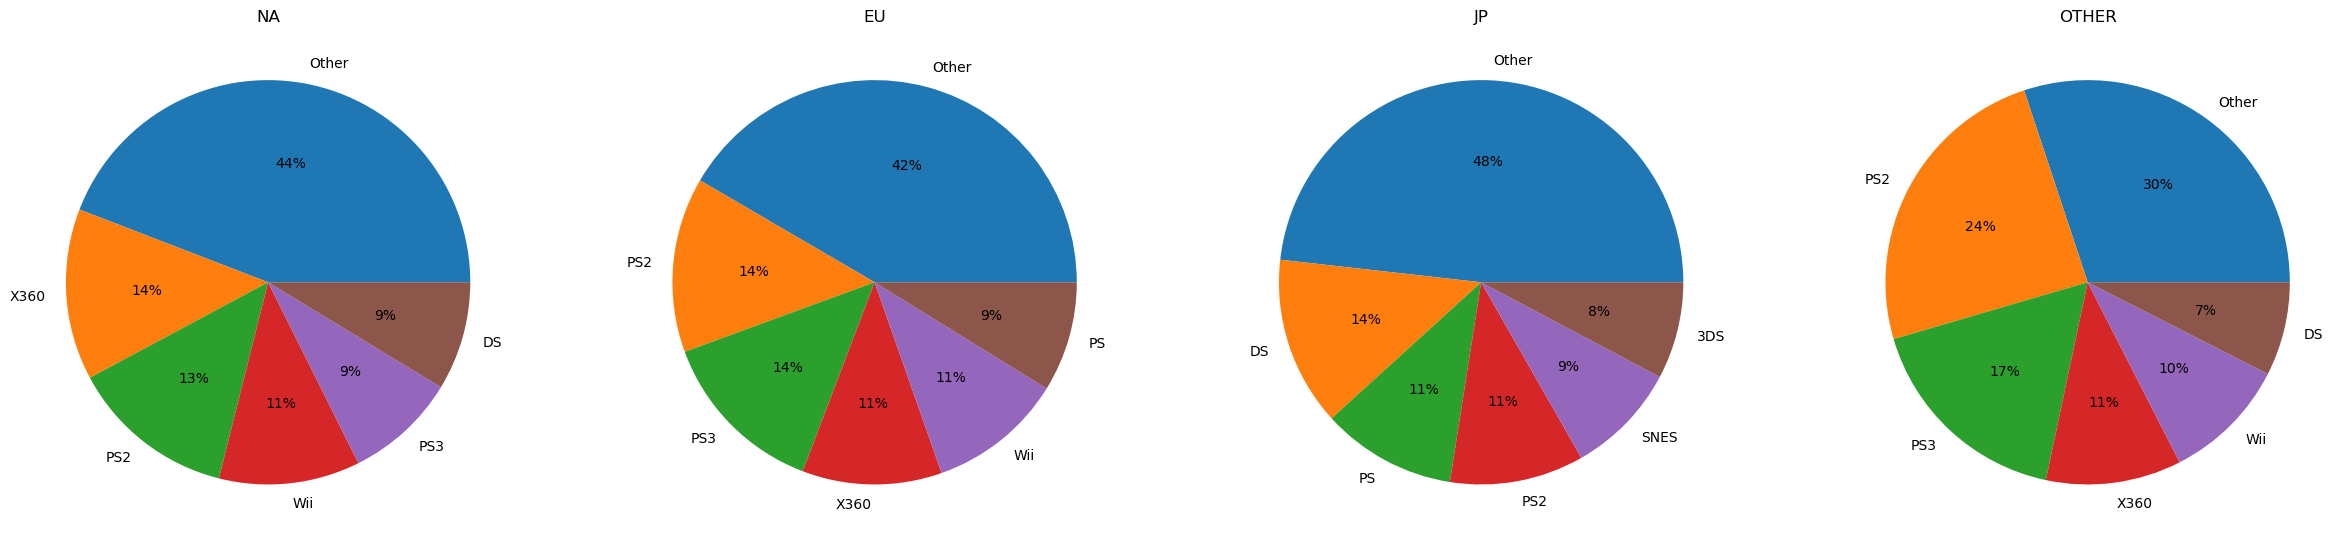

In [33]:
platform_data = games.groupby(by='platform')[['total_sales','na_sales', 'eu_sales','jp_sales','other_sales']].agg('sum')
platform_data = platform_data.sort_values(by='total_sales',ascending=False)
display(platform_data.head(15).style.format('{:.2f}').background_gradient(cmap='Blues', axis=0))

#рисуем пироги
def top5_platforms_by_region(region):
    if region=='na':
        platform_data = games.groupby(by='platform',as_index=False)[['na_sales']].agg('sum')
    elif region == 'eu':
        platform_data = games.groupby(by='platform',as_index=False)[['eu_sales']].agg('sum')
    elif region == 'jp':
        platform_data = games.groupby(by='platform',as_index=False)[['jp_sales']].agg('sum')
    elif region =='other':
        platform_data = games.groupby(by='platform',as_index=False)[['other_sales']].agg('sum')
    elif region == 'total':
        platform_data = games.groupby(by='platform',as_index=False)[['total_sales']].agg('sum')
    platform_data.columns = ['platform','sales']
    platform_data = platform_data.sort_values(by='sales', ascending=False).reset_index(drop=True)
    platform_data.loc[5:,'platform'] = 'Other'  #выделяем топ-5, а остальные - в Others
    platform_data = platform_data.groupby(by='platform',as_index=False)[['sales']].agg('sum') #схлопываем Others
    platform_data = platform_data.sort_values(by='sales', ascending=False).reset_index(drop=True)
    return platform_data

fig, axes = plt.subplots(nrows = 1, ncols=4, figsize = (30,30))
k=0
for i in ['na','eu','jp','other']:
    data = top5_platforms_by_region(i).copy()
    labels = data['platform']
    axes[k].pie(data=data, labels=labels, x=data['sales'], autopct='%.0f%%')
    axes[k].set_title(i.upper())
    k+=1


По каждому региону можно заметить отличительные особенности:
- в Северной Америке:
    - отличительная особенность - пользователи больше всего предпочитают X360 (во всех остальных регионах пользователи в основном предпочитают PS)
    - платформа Wii гораздо более популярна, чем PS2, но не более популярна чем PS3
    - суммарные продажи по большинству платформ выше, чем в остальных регионах
- в Европе:
    - пользователи больше всего предпочитают PS2 и PS3(продажи игр почти на них идентичны) и также одинаково благосклонно относятся к Wii и X360. Можно сказать, что европейские пользователи не гонятся за определенными платформами, а выбирают наиболее популярные мировые варианты.
- в Японии:
    - в этом регионе картина кардинально отличается от мировой. Наиболее популярной платформой является DS, вторыми популярности - PS и PS2. Таке пользуются спросом SNES, NES,3DS, GB. А вот популярные X360 и Wii в Японии совсем не популярны.
- во всем остальном мире:
    - наиболее популярны PS2 и PS3, второе место занимает X360 и далее с небольшим отрывом Wii. Остальные платформы не осбо популярны.

<br> Получается, наиболее выгодной с точи зрения продаж является платформа PS2, а также с учетом больших продаж в Северной Америке - платформа X360.

**4.2 Самые популярные жанры.** <a id='ref4.2'></a> 

Рассмотрим популярность разных жанров по регионам.

In [34]:
genres_data = games.groupby(by='genre')[['total_sales','na_sales', 'eu_sales','jp_sales','other_sales']].agg('sum')
genres_data = genres_data.sort_values(by='total_sales',ascending=False)
display(genres_data.style.format('{:.2f}').background_gradient(cmap='Blues', axis=0))

,total_sales,na_sales,eu_sales,jp_sales,other_sales
genre,,,,,
Action,1744.17,879.01,519.13,161.43,184.60
Sports,1331.27,684.43,376.79,135.54,134.51
Shooter,1052.45,592.24,317.34,38.76,104.11
Role-Playing,934.56,330.81,188.71,355.41,59.63
Platform,827.77,445.50,200.35,130.83,51.09
Misc,802.51,407.27,212.74,108.11,74.39
Racing,728.67,359.35,236.51,56.71,76.10
Fighting,447.53,223.36,100.33,87.48,36.36
Simulation,389.97,181.92,113.52,63.80,30.73


В целом можно сказать, что разброс популярности по жанрам в разных регионах не сильно отличается, кроме Японии.
Какие особенности можно назвать:
- достаточно ярко выделяется отличие Японии, где самым популярным жанром с большим отрывом являются ролевые игры и при этом почти не пользуются спросом шутеры (занимают последнее место из всех жанров). Миролюбивые японцы также могут предпочесть игры жанра Action, но их популярность все равно вдвое меньше, чем жанра "Role-Playing".
- по Северной Америке видна обратная тенденция - ролевые игры не очень опопулярны (7место), но приэтом очень популярны Action, Sport и Shooter.
- по Европе можно сказать, что также популярны Action, Sport и Shooter, но также заметна и любовь европейцев к гонкам. Игры жанра Racing - 4ые по популярности.
- по остальному миру - аналогично популярны Action, Sport и Shooter, а также Racing и Misc.

**4.3 Влияние рейтинга ESRB на продажи.** <a id='ref4.3'></a> 

Посмотрим на влияние рейтинга ESRB на продажи в каждом регионе.
Рейтинги:
- E - Подходит для всех возрастных категорий.
- T - Подходит для лиц старше 13 лет.
- M - Подходит для лиц старше 17 лет.
- E10+ - Подходит для лиц старше 10 лет. 
- AO - Только для взрослых,18+
- EC - Для детей младшего возраста
- RP - Рейтинг ожидается

In [35]:
rating_data = games.groupby(by='rating')[['total_sales','na_sales', 'eu_sales','jp_sales','other_sales']].agg('sum')
rating_data = rating_data.sort_values(by='total_sales',ascending=False)
display(rating_data.style.format('{:.2f}').background_gradient(cmap='Blues', axis=0))

,total_sales,na_sales,eu_sales,jp_sales,other_sales
rating,,,,,
E,2527.97,1343.39,733.96,211.83,238.79
T,1549.11,784.54,444.55,160.20,159.82
M,1521.07,768.59,501.98,68.42,182.08
E10+,688.18,365.76,195.32,51.44,75.66
K-A,4.41,2.59,0.29,1.49,0.04
EC,2.30,2.04,0.11,0.00,0.15
AO,1.96,1.26,0.61,0.00,0.09
RP,0.09,0.00,0.08,0.00,0.01


Логично, что почти во всех странах лидирует рейтинг E (Everyone). Рассмотрим остальные рейтинги.
<br>По остальным рейтингам можно сделать следующие выводы:
 - в Северной Америке количество продаваемых игр для взрослых(M) и для подростков(T) примерно одинаково. Можно сказать, что  обе категории пользователей играют одинаково активно (точнее, обе категории игр одинаково интересны польователям, так как в игры T могут играть и взрослые).
 - в Европе видим, что игры рейтинга M немного более популярны, значит там большое количество взрослых игроков. Также помним, что регион отличался страстью к играм жанра Racing. Возможно, гоночные симуляторы - одно из популярных развлечений среди взрослых европейцев.
 - Япония отличается от всех остальных стран тем, что игры класса M гораздо менее популярны, чем T, что говорит о высокой доле подростков среди игроков. 
 - по всем остальным странам видим, что ситуация схожа с европейскими странами: уровень продаж игр класса T и M близок, но игры для взрослого поколения(M) все таки немного более популярны. 

**Вывод:** на основании проведенного анализа популярности платформ, жанров и рейтингов, можно сформировать портрет пользователя каждого региона:
- Северная Америка: подросток или взрослый, играющий в игру жанра Action/Sport/Shooter на платформе X360, либо PS2.
- Европа: подросток или взрослый, играющий в игру жанра Action/Sport/Shooter на платформе PS2, либо PS3.
- Япония: скорее подросток, играющий в игру Role-Playing на платформе DS или PS.

## Проверим гипотезы

**5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.** <a id='ref5.1'></a> 

Сформулирует нулевую и альтернативную гипотезы:
<br> Нулевая гипотеза: средние рейтинги скорее всего одинаковые
<br> Альтернативная гипотеза: средние рейтинги не одинаковые.
<br> В качестве нулевой гипотезы используем гипотезу о равестве, так как необходимый метод st.ttest_ind позволяет проверить именно равенство выборочных средних по двум независимым выборкам и отвергнуть гипотезу о равенстве в случае, когда выборочные средние слишком сильно отличаются.

In [36]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

x360_scores = games.query('platform=="X360"')['user_score']
ps_scores = games.query('platform=="PS"')['user_score']

results = st.ttest_ind(x360_scores, ps_scores)

print('Средний пользовательский рейтинг X360:',round(x360_scores.mean(),2))
print('Средний пользовательский рейтинг PS:',round(ps_scores.mean(),2))
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве средних')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Средний пользовательский рейтинг X360: 4.88
Средний пользовательский рейтинг PS: 0.2
p-значение: 2.7378867563341513e-220
Отвергаем нулевую гипотезу о равенстве средних


По покатзателям средних и проведенному тесту видим, что средние пользовательские рейтинги не одинаковые, рейтинг X360 составляет 4,88 против рейтинга PS - 0.2.

**5.2 Средние пользовательские рейтинги жанров Action и Sports разные.** <a id='ref5.2'></a> 

Сформулирует нулевую и альтернативную гипотезы:
<br> Нулевая гипотеза: средние рейтинги скорее всего одинаковые
<br> Альтернативная гипотеза: средние рейтинги не одинаковые.
<br> В качестве нулевой гипотезы используем гипотезу о равестве, так как необходимый метод st.ttest_ind позволяет проверить именно равенство выборочных средних по двум независимым выборкам и отвергнуть гипотезу о равенстве в случае, когда выборочные средние слишком сильно отличаются.

In [37]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

action_scores = games.query('genre=="Action"')['user_score']
sports_scores = games.query('genre=="Sports"')['user_score']

results = st.ttest_ind(action_scores, sports_scores)

print('Средний пользовательский рейтинг жанра Action:',round(action_scores.mean(),2))
print('Средний пользовательский рейтинг жанра Sports:',round(sports_scores.mean(),2))
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве средних')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Средний пользовательский рейтинг жанра Action: 3.37
Средний пользовательский рейтинг жанра Sports: 2.74
p-значение: 1.2025568367391132e-08
Отвергаем нулевую гипотезу о равенстве средних


В данном случае можно сказать, что рейтинги действительно разные.

## Общий вывод

**Итоговый вывод по проекту:**
У на имелись данные по продажам игр в интернет-магазине "Стримчик". Данные содержали:
- информацию об игре (название, год выпуска, платформа, возрастной ценз)
- информацию о количествах продаж в каждом регионе
- информацию о пользовательских и экспертных рейтингах игры

<br>**Этап предобработки данных:**
<br>На этапе предобработки данных были выявлены и решены следующие проблемы:
- поля были переименованы в корректный формат (lowcase)
- были изменены типы полей и заполнены пропуски:
    - **year_of_release**: поле преобразовано в int, тк. год выпуска не может быть дробным числом. В качестве замены для значениий NaN поставлен год 1970.
    - **user_score**: преобразовано в тип float. Значения NaN и tbd заменены их на -1  
- а также были заполнены пропуски:
    - пропуски по полям **name,genre** объяснить скорее всего можно только техническими причинами. Вероятно, возникли ошибки при выгрузке данных, так как если есть продажи по какой-либо игре, то игра должна иметь название (и скорее всего жанр). Оба поля не заполнены по двум одни и тем же строкам, соответственно, можно сделать вывод, что данные поля загружались из одного источника, либо были как-то взаимосвязаны. Эти пропуски были заполнены значением "Не указано", т.к. не хотелось бы потерять информацию о продажах в общем отчете.
    - пропуски в поле **critic_score** были заполнены медианой, так как поле количественное. Медиана взята по каждой игре в отдельности, так как это позволяет наиболее точно заполнить пропуски, хотя и не все. Пропуск скорее всего вызваны тем, что по некоторым играм критики не выносили оценку, т.е. играет роль организационный фактор.
    - пропуски по полю **rating** были заполнены модой, так как поле категориальное. Также как и в случае с critic_score заполнение производилось по каждой игре в отдельности. Причиной возникновения пропусков можно назвать организационный фактор: по определенным играм рейтинг игры мог не формироваться из-за недостаточности оценок например, либо игра очень старая, либо потому что игра только вышла и еще не успела получить оценку (в таком случае может быть значение tbd).

<br>**Исследовательский анализ данных:**
<br>На этапе исследовательского анализа было проанализировано:

<br>**1. Количество выпускаемых игр в разные года**
<br>Количество выпускаемых игр стремительно росло примерно до 2008-2010 года, а затем снизилось примерно до уровня 2000-го года. Возможно, объясняется это тем, что мобильные телефоны достигли достаточного уровня развития и пользователи переключились на мобильные игры (соответственно, игр на платформах в связи с уменьшившимся спросом тоже стало выпускаться меньше).

<br>**2. Продажи по различным платформам**
- Наиболее полпулярные платформы всех лет: PS2,X360, PS3,Wii,DS,PS. 
- Наименее популярная платформа - PCFX.
- некоторые платформы постепенно заменяли друг друга (например, PS->PS2->PS3). 
- платформа, выпустившая игру первой - DS, впервые выпустившая игру в 1985году (но, похоже, продаж от нее так и не получившая), однако затем она не выпускала игр вплоть до 2004года. Так что первым сильным лидером можно назвать платформу PS, которая имела хорошие продажи примерно c 1994 до 2004года, а затем была заменена более современной версией PS2
- платформы, получавшие максимальные годовые продажи - PS2(2000-2005годы) и Wii(2009год).
- за последние 5 лет (2010-2015годы) выделяются два лидера - X360 и PS3, продажи которых находились примерно на одном уровне.
- по всем платформам в последние годы в основном наблюдается спад продаж

<br>Если смотреть данные за последние 3 года:
- В последние 3 года игры выпускают только 3 платформы: PS3, X360 и Wii  и на текущий момент их продажи находятся практически на одном уровне. Однако PS3, X360 (в отличие от Wii) в последние 3 года имели продажи гораздо выше (до 80-110 млн. копий игр) и затем постепенно снизили продажи практически до 1,5-3,5млн.копий, в то время как Wii постепенно сдала позиции уже в 2011-2013годах  году и к 2016году продает не более 200тыс.копий игр.

<br>Таким образом, последние три года потенциально прибыльными платформами игр явяются PS3 и X360, причем, несмотря на то, что падение продаж PS3 происходит быстрее, на конец 2016года PS3 продает почти вдвое больше игр, чем X360 - 3,6млн.копий против 1,5млн копий у X360.

<br>**3. Продажи по играм**
Суммарные продажи составляют в основном от 60тыс до 470тыс. копий. При этом есть выбросы и одна из игр была продана более чем 82,5млн раз - WiiSports.
<br>Большинство выпускаемых игр даже близко не могут приблизиться к успеху игр, которые мы видим в top-10. По общей описательной статистике , 75% квартиль по суммарным продажам не превышает полумиллиона проданных копий.
<br>За всю историю в целом превысили планку продаж хотя бы в 1млн.копий только 2тыс.игр.
<br> Наибольшее число популярных игр за всю историю было у платформ платформ Wii, DS и PS. Однако, как видим, платформа DS перестала выпускать игры в 2014году, а также PSиPS2 обновились до PS3 и шестерка лидеров превратилась в тройку.
<br>По данным за последние 3 года, можно проследить стратегию каждой компании из тройки за последние 3 года:
- у платформы PS3 больше всего игр-самородков, приносящих свервысокие продажи (максимально высокие выбросы), однако при этом и самый низкий 75% квартиль, что означает, что компания также выпускает много непопулярных игр. То есть, компания работает на количество: чем больше количество разнообразных игр, тем более вероятно, что какие-то из них станут мегапопулярными. При этом неудачные релизы снижают общую статистику по продажам.
- у компании Wii противоположный подход: меньше всего выбросов, но самый высокий 75% квартиль, что говорит о том, что каждая выпущенная игра стабильно хорошо продается, но при этом мегапопулярной (как некоторые игры PS3) скорее всего не станет (мы видим только 1 выброс и он втрое ниже, чем максимальный выброс по PS3).
- у компании X360 средний подход: есть и стабильно продаваемые игры, и при этом достаточное количество высоких выбросов.

<br>**4. Зависимость продаж от рейтинга критиков и пользователей**
На примере платформы PS3 Были проанализированы зависимости.
- игры с высокой оценкой критиков могут как быть очень популярными, так и непопулярными. Однако, игры с низкой оценкой критиков не бывают сверхпопулярными - до оценки 70 нет даже единичных выбросов. Верхняя граница области разброса довольно четкая. 
- по оценкам пользователей зависмость менее однозначная: есть непопулярные игры с высокой оценкой и сверхпопулярные игры  со средней или даже низкой оценкой. Это логично, у разных пользователей разные вкусы и предпочтения и разное субъективное восприятие игр, поэтому оценки могут отличаться от оценок экспертов, которые могут оценивать только объективно по заданным критериям. Но так как продажи формируются именно пользователями (а не критиками), то и даже при высокой оценке критиков игра может стать как популярнй, так и наоборот.
<br>Почему есть случаи низкой оценки пользователей и высокого уровны продаж? Тут скорее всего играют роль несколько факторов: 
- мы не знаем в какое время проставлялись оценки. Возможно, игра вышла например в начале 2000х годов, получила высокие оценки критиков и изначально хорошо продавалась, но со временем игра устаревала, а пользователи продолжали ее устанавливать и проставлять оценки, но из-за того, что игра уже не соответствует времени, итоговая оценка снижалась. 
- либо игра могла быть очень популярна в одном регионе и там формировать основной доход, но при этом вызвала негативные отклики в другом регионе, что вызвало ухудшение общей оценки. Такои случаи можно отдельно проанализировать.
- также фактор, который может повлиять: не все пользователи, которые покупают ту или иную игру, могут проставлять оценки по ней. Скорее всего, есть большое количество людей, которые просто играют (и формируют продажи), но не оставляют ни оценок, ни отзывов.
<br>Коэффицицент корреляции продаж от оценки критиков по платформе PS3 равен 0,4 (средняя корреляция), в то время как корреляция от оценки пользователей равна 0,27 (слабая). Также прослеживается средняя корреляция оценки пользователей от оценки критиков на уровне 0,4, но это скорее говорит о частых случаях, когда мнения критиков и пользователей об игре совпадают, нежели о реальной зависимости оценки пользователей от критиков или наоборот.
<br> Если смотреть в целом по всем платформам, то коэффициенты корреляции становятся еще меньше: 0,23 для оценки экспертов и 0,2 для оценки пользователей. Возможно тут влияет тот факт, что среди наших платформ есть старые и новые поколения одной и той же платформы (PS, PS2, PS3). Также возможно, играет роль, что система оценок могла меняться со временем (мы не ограничивали игры по году выпуска), либо могло меняться общее количество пользовательских оценок (пользователей в 1990году скорее всего было меньше чем в 2014г), а значит и выборка была разного объема.

<br>**4. Распределение игр по жанрам**
Выделяются наиболее популярные жанры в порядке убывания популярности: Action, Sports, Shooter, Role-Playing, Platform.
<br> При этом, количество игр в каждой категории не всегда коррелирует с количеством установок. Например, шутеров больше, чем стратегий примерно в 2 раза, а количество их установок больше в 6 раз. Аналогично: платформенных игр вдвое меньше, чем игр категории "Misc"(разное), а установок они приносят вдвое больше, то есть эффективность платформенных игр с точки зрения продаж выше в 4 раза.
<br>Однако, конечно, стоит не забывать, что это общая статистика, включающая игры-самородки, где кол-во установок одной только игры может достигать 80млн, поэтому и вся категория может быть в топе только из-за одной или нескольких сверхпопулярных игр.
<br>В качестве непопулярных жанров можно выделить стратегии, приключения и пазлы. 

<br>**Портрет пользователя каждого региона:**
<br>На данном этапа был сформирован портрет наиболее вероятного пользователя в каждом регионе:
- Северная Америка: подросток или взрослый, играющий в игру жанра Action/Sport/Shooter на платформе X360, либо PS2.
- Европа: подросток или взрослый, играющий в игру жанра Action/Sport/Shooter на платформе PS2, либо PS3.
- Япония: скорее подросток, играющий в игру Role-Playing на платформе DS или PS.

<br>**Этап проверки гипотез:**
<br> На данном этапе были проверены две гипотезы. 
<br>**1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**
<br> Нулевая гипотеза: средние рейтинги скорее всего одинаковые
<br> Альтернативная гипотеза: средние рейтинги не одинаковые.
<br>**Вывод:**
<br>Средний пользовательский рейтинг X360: 4.88
<br>Средний пользовательский рейтинг PS: 0.2
<br>p-значение: 2.7378867563341513e-220
<br>Отвергаем нулевую гипотезу о равенстве средних. Средние пользовательские рейтинги не одинаковые, рейтинг X360 составляет 4,88 против рейтинга PS - 0.2.
<br>**2. Средние пользовательские рейтинги жанров Action и Sports разные**
<br> Нулевая гипотеза: средние рейтинги скорее всего одинаковые
<br> Альтернативная гипотеза: средние рейтинги не одинаковые.
<br>**Вывод:**
<br>Средний пользовательский рейтинг жанра Action: 3.37
<br>Средний пользовательский рейтинг жанра Sports: 2.74
<br>p-значение: 1.2025568367391132e-08
<br>Отвергаем нулевую гипотезу о равенстве средних. В данном случае можно сказать, что рейтинги действительно разные.




